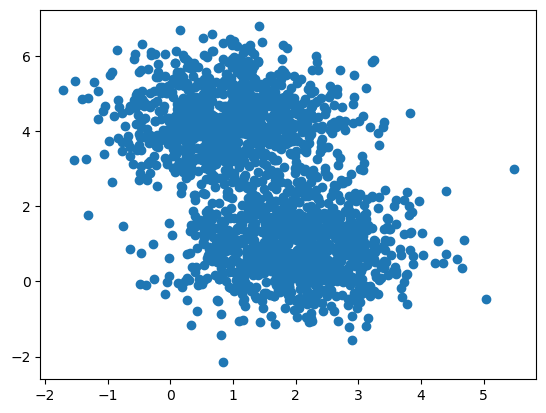

In [6]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x,y = make_blobs(n_samples=2000, centers=2, cluster_std=0.9,random_state=0)
plt.scatter(x[:,0], x[:,1])

In [7]:
x[:,0]

array([ 2.6778736 ,  1.52700455,  3.01396976, ...,  0.82934062,
        0.71616539, -0.49831118])

In [8]:
x[:,1]

array([1.40561305, 3.09644027, 1.21910196, ..., 4.22597757, 2.5050118 ,
       2.70503757])

In [15]:
df = pd.DataFrame(data=x, columns=['X1', 'X2'])

In [16]:
df

,X1,X2
0,2.677874,1.405613
1,1.527005,3.096440
2,3.013970,1.219102
3,2.078654,4.362158
4,0.037454,3.532417
...,...,...
1995,0.240526,3.042575
1996,1.346938,0.371370
1997,0.829341,4.225978
1998,0.716165,2.505012


In [17]:
ee = EllipticEnvelope(contamination=0.01)
ee.fit(df)

EllipticEnvelope(contamination=0.01)

In [18]:
prediction = ee.predict(df)

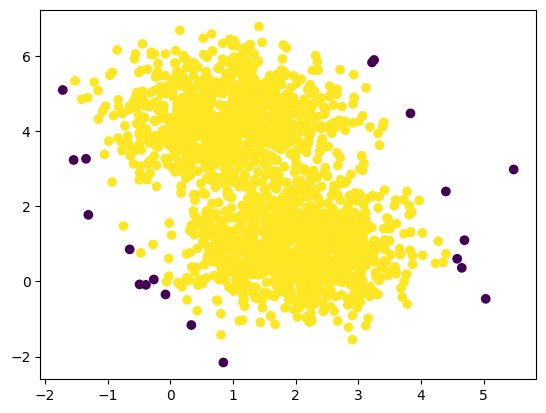

In [19]:
plt.scatter(df['X1'], df['X2'],c=prediction)

In [21]:
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
outliers = np.where(prediction == -1)

In [31]:
outliers

(array([  30,  141,  206,  455,  473,  904,  956,  994, 1082, 1334, 1396,
        1403, 1446, 1525, 1639, 1681, 1718, 1775, 1802, 1899]),)

In [32]:
import pickle
pickle.dump(ee, open('outlier.pkl','wb'))